# An integrated module of cloud image data preprocessing for deep learning

In [1]:
# Denpendencies and functions
from src.dependencies import *
from src.functions import *

2022-05-20 02:13:58.360296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jupyter-u7382599/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-05-20 02:13:58.360333: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Documentation

### Background

Classifying cloud types in the atmosphere particularly over the Southern Ocean is helpful to improve the simulation accuracy of climate models. Deep learning provides a automated method to process a huge amount of cloud image data. However, a lot of data preprocessing procedures should be done in advance to make sure the deep-learning model can study from the cloud images correctly and efficiently. In this project I plan to build a module in order to do image data 1) input, 2) preprocessing and 3) augmentation.  

A cloud image dataset captured from the Kerguelen Plateau is used here as an example. The module is expected to use for other cloud image datasets or images of other objects through simple modification.

### Import

The first thing is to import image dataset and resize images in this process. Deep-learning models require specified data size and format, which is why we should define the importing fucntion. Package `cv2` is used here to convert size and color. The center area of images is cropped out to remove needless edges. The imported data is stored in an array format from package `numpy`. Some image samples would be ploted.  

Every image element should correspond to a label element. We can test returned variables of the importing fucntion with the size of *Images* and *Labels* arrays and the type of *classes* array. The function used to plot random images is tested with the type of returns.

### Processing

Data processing methods should be applied before inputing the data into deep-learning models, which would be important for improving final model performance. Here, some useful methods are provided, including subtracting mean RGB values, image normalization and converting labels into one hot matrices (from package `tensorflow.keras`). The full dataset is split to smaller sets for training, test and validation (from package `sklearn`) according to the given ratio.  

The function that subtracts mean RGB values on the training set is tested with mean R value of the returned array, which should be 0 after subtraction.

### Augmentation

Data augmentation is particularly essential for limited dataset. This procedure allows deep-learning models to output new images randomly in model training based on the original data. Therefore, the number of data used for training is enlarged, which is helpful for improving model accuracy. An image data generator is built to achieve this functionality based on the fucntions from package `tensorflow.keras`. It contains the operations like flipping, rotation, zoom, etc. This full list of operations this image data generator is able to do can be found in [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).  

Output generators from this section can be directly used to fit deep-learning models.

The type of the image data generator will be tested to make sure it is generated correctly.

## Code

In [2]:
# Import
Images, Labels, classes = get_images('src/K-Axis Cloud Types', random_value = 1)


Loading src/K-Axis Cloud Types
-----------------------------------------------------------
SZA042


100%|██████████| 125/125 [00:01<00:00, 111.68it/s]


-----------------------------------------------------------
SZA046


100%|██████████| 113/113 [00:01<00:00, 108.58it/s]


-----------------------------------------------------------
SZA028


100%|██████████| 117/117 [00:01<00:00, 114.36it/s]


-----------------------------------------------------------
SZA024


100%|██████████| 102/102 [00:00<00:00, 111.19it/s]


Number of image samples = 1200
Image shape: (227, 227)
Categories in this image dataset: ['Cumuliform' 'Multilayer' 'Precip' 'Stratiform']


Display 25 image samples from total 1200 images.


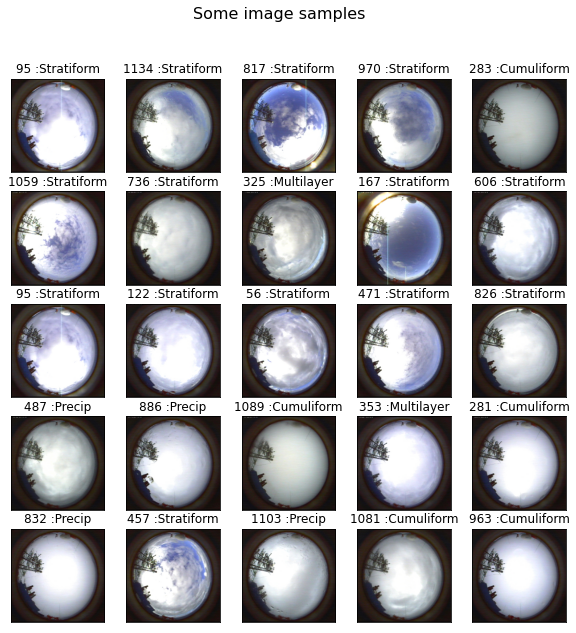

In [3]:
# Normalize image vectors
Images_1 = Images/255.

# Convert training and test labels to one hot matrices
Labels_1 = to_categorical(Labels)

# display some image samples
Fig = display_random_image(classes, Images_1, Labels)


In [4]:
# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(Images_1, Labels_1, 
                                                                  test_size = 0.1, stratify=Labels_1,
                                                                  random_state=1)
print("Number of test set:", x_test.shape[0])

# Split train and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                                  test_size = 0.2, stratify=y_train,
                                                                  random_state=1)
print("Number of validation set:", x_val.shape[0])
print("Number of training set:", x_train.shape[0])

Number of test set: 120
Number of validation set: 216
Number of training set: 864


In [5]:
# Subtract mean RGB values computed on the training set for each pixel
x_train_mean = subtract_meanRGB(x_train)


Subtract mean RGB values on 864 images.


In [6]:
# Augmentation

## for training set
TrainGen = Image_Generator(x_train_mean,y_train,
                           Horizontal_flip=True,
                           Vertical_flip = True,
                           Rotation_range=180)

## for validation set
ValGen = Image_Generator(x_val,y_val,
                           Horizontal_flip=True,
                           Vertical_flip = True,
                           Rotation_range=180)

## Test

The functions in each section above are tested in a test function. If all test functions run successfully, we can believe the module has implemented all functions expected and works well. However, the module's actual performance should be validated through applying it to the training of deep-learning models. This would be a part of future work.

In [1]:
! pytest -W "ignore::DeprecationWarning" 

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-7.1.2, pluggy-1.0.0
rootdir: /home/jupyter-u7382599/EMSC-4033-2022_Project_Jiarun
plugins: anyio-3.5.0
collected 4 items                                                              

src/test_functions.py ....                                               [100%]

============================== 4 passed in 28.21s ==============================
